In [12]:
from ml_methods.clustering.clustering import MyKMeans, MyDBSCAN
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [14]:
X_blobs = StandardScaler().fit_transform(X_blobs)
X_moons = StandardScaler().fit_transform(X_moons)

In [15]:
my_km = MyKMeans(k=3); my_km.fit(X_blobs)
sk_km = KMeans(n_clusters=3, init='random', n_init=1); sk_km.fit(X_blobs)

my_db = MyDBSCAN(eps=0.3, min_samples=5); my_db.fit(X_moons)
sk_db = DBSCAN(eps=0.3, min_samples=5); sk_db.fit(X_moons)

,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


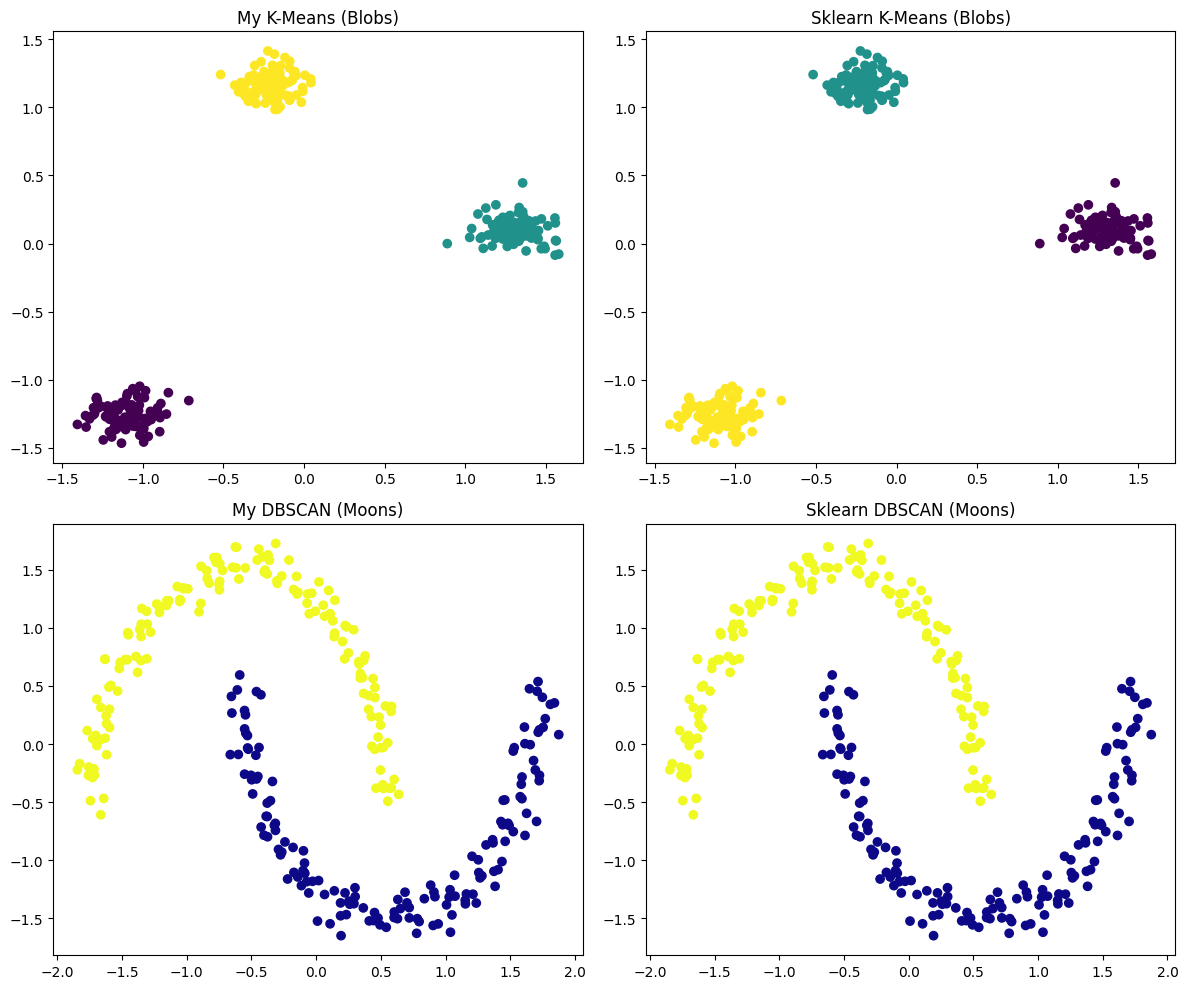

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=my_km.labels_, cmap='viridis')
axs[0, 0].set_title("My K-Means (Blobs)")
axs[0, 1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=sk_km.labels_, cmap='viridis')
axs[0, 1].set_title("Sklearn K-Means (Blobs)")

axs[1, 0].scatter(X_moons[:, 0], X_moons[:, 1], c=my_db.labels_, cmap='plasma')
axs[1, 0].set_title("My DBSCAN (Moons)")
axs[1, 1].scatter(X_moons[:, 0], X_moons[:, 1], c=sk_db.labels_, cmap='plasma')
axs[1, 1].set_title("Sklearn DBSCAN (Moons)")

plt.tight_layout()
plt.show()